### Μέλη Ομάδας:
Ον/μο1:  Χρύσα Ριζεάκου
Αρ. Μητρώου 1:  03117124

Ον/μο2:  Μαρία Ελευθερία Βλόντζου
Αρ. Μητρώου 2:  03117020

# Τεχνητή Νοημοσύνη: Εργαστηριακή Άσκηση 3 
Στην άσκηση αυτή θα υλοποιηθούν διάφοροι (σχετικά απλοί) αλγόριθμοι μηχανικής μάθησης για την αυτόματη αναγνώριση μεταξύ 3 μουσικών είδών απο τα δεδομένα που προσφέρει η υπηρεσία Spotify. Συγκεκριμένα, θα δίνονται δύο σύνολα δεδομένων $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ όπου κάθε $x_i\in{\mathbb{R}^p}$ είναι ένα διάνυσμα με τα μουσικά χαρακτηριστικά κάθε κομματιού (όπως dancability, acousticness κ.α.) και $y_i$ είναι το είδος του κομματιού - ένας ακέραιος στο $[0,2]$. Σε κάθε περίπτωση καλείστε να σχεδιάσετε έναν ταξινομητή, δηλαδή μια απεικόνιση $$f:\mathbb{R}^p\rightarrow{[0,2]}$$

# 1ο Μέρος: Αξιολόγηση
Στο πρώτο μέρος της άσκησης θα υλοποιηθούν συναρτήσεις που θα χρησιμοποιηθούν για την αξιολόγηση των ταξινομητών που θα χρησιμοποιηθούν στα επόμενα μέρη.

Παρακάτω σας δίνεται η κλάση Evaluate, η οποία υπολογίζει διάφορες μετρικές με τη μέθοδο get_metrics, εντοπίζει αντικείμενα που ταξινομήθηκαν λάθος και τα εμφανίζει (μέθοδος get_sample_of_wrong), και υπολογίζει τον πίνακα σύγχυσης (confusion matrix) όπου οπτικοποιούνται ανά κατηγορία οι προβλέψεις του ταξινομητή.

Για το μέρος αυτό καλείστε να υλοποιήσετε στη μέθοδο my_accuracy τη μετρική accuracy, η οποία ορίζεται ως:
$$accuracy = \frac{\#σωστών\_προβλέψεων}{\#δεδομένων}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true 
      y_pred = self.y_pred
      
      correct = 0
      for i in range(len(y_true)):
        if(y_true[i] == y_pred[i]):
          correct += 1
        
      acc = correct / len(y_true)

      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Παράδειγμα χρήσης της κλάσης. Κανονικά στο x θα υπάρχουν τα δεδομένα από το dataset

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

To dataset που σας δίνεται περιέχει πληθώρα μουσικών κομματιών για τα οποία έχουν καταγραφεί διάφορα χαρακτηριστικά τους, όπως επίσης και το μουσικό είδος στο οποίο ανήκουν. Στη συγκεκριμένη άσκηση θα δουλέψουμε με ένα υποσύνολο (αριθμητικών) χαρακτηριστικών, τα οποία συνεισφέρουν στον καθορισμό της μουσικής κατηγορίας κάθε κομματιού.  

Τα χαρακτηριστικά τα οποία θα μελετήσουμε στην παρούσα άσκηση είναι τα "acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness", ενώ οι κατηγορίες στις οποίες καλούμαστε να ταξινομήσουμε τα μουσικά κομμάτια είναι οι "Electronic", "Rock", και "Rap".  


In [ ]:
# Σύνδεση του Google Colab με το Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Θα χρησιμοποιήσουμε τα DataFrames της βιβλιοθήκης pandas για να χειριστούμε τα δεδομένα μας. Μπορείτε να βρείτε περισσότερες πληροφορίες για τα pandas DataFrames στο αντίστοιχο [documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html).

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/My Drive/TN/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
# What can we see here?
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Επιλογή χαρακτηριστικών x και στόχων y.  

Για λόγους απλότητας επιλέγουμε τα χαρακτηριστικά (inputs) και τις κατηγορίες-στόχους (genres). Καλείστε να διαχωρίσετε τα δεδομένα σε train/test set. Ας θεωρήσουμε το διαχωρισμό 30% - test set, 70% - train set.

In [ ]:
from sklearn.model_selection import train_test_split
# χαρακτηριστικά
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# κατηγορίες-στόχοι
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# φιλτράρουμε το DataFrame ώστε να διατηρήσουμε μόνο τις 3 κατηγορίες που μας ενδιαφέρουν.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

labels = data.loc[:,'music_genre']

labels_id_list=[]

labels_id_list=list(map(genres_to_id.get, labels))
labels_id = pd.Series(labels_id_list)

features = data.filter(inputs, axis=1)

# εδώ πρέπει να διαχωρίσετε τα δεδομένα σε train (70% των δεδομένων)/test set (30% των δεδομένων)
# ονομάστε τις μεταβλητές ως εξής:
# τα χαρακτηριστικά του train set: x_train
# τις κατηγορίες-στόχους του train set: y_train
# τα χαρακτηριστικά του test set: x_test
# τις κατηγορίες-στόχους του test set: y_test

x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(features, labels_id, test_size=0.3)

x_test = x_test_df.to_numpy()
y_test = y_test_df.to_numpy()
x_train = x_train_df.to_numpy()
y_train = y_train_df.to_numpy()


Δημιουργήθηκε το Series με όνομα labels, το οποίο περιλαμβάνει τις κατηγορίες-στόχους σε μορφή strings και στη συνέχεια με βάση το λεξικό genres_to_id που μας δόθηκε, έγινε map του labels, ώστε να αποδοθεί σε καθένα από τα τρία είδη το αντίστοιχο νούμερο. Τα labels με τη μορφή αυτή, αποθηκεύονται στο Series με όνομα labels_id με βάση το οποίο, σε συνδυασμό με το features, γίνεται και το train_test_split. 

Για τον διαχωρισμό του dataset έγινε κλήση της train_test_split από την scikit-learn και επιλέχθηκε ο διαχωρισμός με ποσοστά 70% train set και 30% test set, όπως υποδεικνυόταν στην εκφώνηση.

Τα x_train, y_train, x_test και y_test μετατράπηκαν σε numpy arrays, ώστε να μπορέσουν να αξιοποιθούν παρακάτω από τα μοντέλα.

## Μορφή των δεδομένων  

Βεβαιωθείτε ότι τα δεδομένα σας έχουν τη σωστή μορφή εκτυπώνοντας τον αριθμό γραμμών και στηλών για τα x_test, y_test, x_train, y_train.

In [ ]:
# Shape of x_test, y_test, x_train, y_train

print("x_test size is: ", x_test.shape)
print("y_test size is: ", y_test.shape)
print("x_train size is: ", x_train.shape)
print("y_train size is: ", y_train.shape)

x_test size is:  (4060, 6)
y_test size is:  (4060,)
x_train size is:  (9471, 6)
y_train size is:  (9471,)


Η μορφή των δεδομένων είναι η αναμενόμενη. Παρατηρούμε ότι τα set εξόδου έχουν μία διάσταση ενώ τα x_train και x_test αποτελούνται από 6 στήλες-χαρακτηριστικά. Παρατηρούμε επιπλέον, πως το πλήθος των γραμμών του train set αποτελεί το 70% του συνολικού πλήθους γραμμών και του test set το 30% αντίστοιχα.

Αναφορικά με τις τιμές των χαρακτηριστικών, είναι σημαντικό να γνωρίζουμε το εύρος τους, δηλαδή τη μέγιστη και την ελάχιστη τιμή που λαμβάνει το κάθε χαρακτηριστικό. Εξερευνήστε το εύρος του κάθε χαρακτηριστικού στα train και test set. 

In [ ]:
# Range of x_train, x_test columns
print("Features' range in train set:")
print()
print("Maximum value of acousticness in x_train is: ", x_train_df['acousticness'].max())
print("Minimum value of acousticness in x_train is: ", x_train_df['acousticness'].min())
print("Range of acousticness in x_train is: ", x_train_df['acousticness'].max()-x_train_df['acousticness'].min())
print()
print("Maximum value of danceability in x_train is: ", x_train_df['danceability'].max())
print("Minimum value of danceability in x_train is: ", x_train_df['danceability'].min())
print("Range of danceability in x_train is: ", x_train_df['danceability'].max()-x_train_df['danceability'].min())
print()
print("Maximum value of energy in x_train is: ", x_train_df['energy'].max())
print("Minimum value of energy in x_train is: ", x_train_df['energy'].min())
print("Range of energy in x_train is: ", x_train_df['energy'].max()-x_train_df['energy'].min())
print()
print("Maximum value of instrumentalness in x_train is: ", x_train_df['instrumentalness'].max())
print("Minimum value of instrumentalness in x_train is: ", x_train_df['instrumentalness'].min())
print("Range of instrumentalness in x_train is: ", x_train_df['instrumentalness'].max()-x_train_df['instrumentalness'].min())
print()
print("Maximum value of liveness in x_train is: ", x_train_df['liveness'].max())
print("Minimum value of liveness in x_train is: ", x_train_df['liveness'].min())
print("Range of liveness in x_train is: ", x_train_df['liveness'].max()-x_train_df['liveness'].min())
print()
print("Maximum value of speechiness in x_train is: ", x_train_df['speechiness'].max())
print("Minimum value of speechiness in x_train is: ", x_train_df['speechiness'].min())
print("Range of speechiness in x_train is: ", x_train_df['speechiness'].max()-x_train_df['speechiness'].min())
print()

print()

print("Features' range in test set:")
print()
print("Maximum value of acousticness in x_test is: ", x_test_df['acousticness'].max())
print("Minimum value of acousticness in x_test is: ", x_test_df['acousticness'].min())
print("Range of acousticness in x_test is: ", x_test_df['acousticness'].max()-x_test_df['acousticness'].min())
print()
print("Maximum value of danceability in x_test is: ", x_test_df['danceability'].max())
print("Minimum value of danceability in x_test is: ", x_test_df['danceability'].min())
print("Range of danceability in x_test is: ", x_test_df['danceability'].max()-x_test_df['danceability'].min())
print()
print("Maximum value of energy in x_test is: ", x_test_df['energy'].max())
print("Minimum value of energy in x_test is: ", x_test_df['energy'].min())
print("Range of energy in x_test is: ", x_test_df['energy'].max()-x_test_df['energy'].min())
print()
print("Maximum value of instrumentalness in x_test is: ", x_test_df['instrumentalness'].max())
print("Minimum value of instrumentalness in x_test is: ", x_test_df['instrumentalness'].min())
print("Range of instrumentalness in x_test is: ", x_test_df['instrumentalness'].max()-x_test_df['instrumentalness'].min())
print()
print("Maximum value of liveness in x_test is: ", x_test_df['liveness'].max())
print("Minimum value of liveness in x_test is: ", x_test_df['liveness'].min())
print("Range of liveness in x_test is: ", x_test_df['liveness'].max()-x_test_df['liveness'].min())
print()
print("Maximum value of speechiness in x_test is: ", x_test_df['speechiness'].max())
print("Minimum value of speechiness in x_test is: ", x_test_df['speechiness'].min())
print("Range of speechiness in x_test is: ", x_test_df['speechiness'].max()-x_test_df['speechiness'].min())

Features' range in train set:

Maximum value of acousticness in x_train is:  0.9940000000000001
Minimum value of acousticness in x_train is:  2.57e-06
Range of acousticness in x_train is:  0.9939974300000001

Maximum value of danceability in x_train is:  0.975
Minimum value of danceability in x_train is:  0.0645
Range of danceability in x_train is:  0.9105

Maximum value of energy in x_train is:  0.998
Minimum value of energy in x_train is:  0.00259
Range of energy in x_train is:  0.99541

Maximum value of instrumentalness in x_train is:  0.986
Minimum value of instrumentalness in x_train is:  0.0
Range of instrumentalness in x_train is:  0.986

Maximum value of liveness in x_train is:  0.9840000000000001
Minimum value of liveness in x_train is:  0.0173
Range of liveness in x_train is:  0.9667000000000001

Maximum value of speechiness in x_train is:  0.922
Minimum value of speechiness in x_train is:  0.0224
Range of speechiness in x_train is:  0.8996000000000001


Features' range in te

Από την παραπάνω ανάλυση προκύπτουν κάποια ερωτήματα σημαντικά για τα επόμενα βήματα:
- Έχουν τα χαρακτηριστικά μας περίπου το ίδιο εύρος;

Τα χαρακτηριστικά παρουσιάζουν εύρος στην ίδια τάξη μεγέθους, έχουν δηλαδή περίπου το ίδιο εύρος. Αυτό ισχύει τόσο μεταξύ των χαρακτηριστικών που ανήκουν στο x_train και αυτών στο x_test, όσο και για το εύρος του ίδιου χαρακτηριστικού στα δύο set.

- Σε πολλές εφαρμογές είναι σημαντικό τα χαρακτηριστικά να βρίσκονται στο εύρος [0, 1]. Ισχύει αυτό στην περίπτωσή μας; 

Επιπλέον, τα χαρακτηριστικά είναι κανονικοποιημένα, εφόσον βρίσκονται στο εύρος [0,1]. Το γεγονός αυτό θα φανεί στη συνέχεια ιδιαίτερα χρήσιμο στον ταξινομητή Naive Bayes, όπου μετασχηματίζουμε τα χαρακτηριστικά, ώστε να λαμβάνουν boolean τιμές χωρισμένα σε διαφορετικά bins με εύρη στο [0,1].

# 2o Μέρος: Υλοποίηση KNN
Στο δεύτερο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο KNN για ταξινόμηση. Υπενθυμίζεται από τις διαφάνειες το πλάνο σχεδιασμού για τον ταξινομητή k κοντινότερων γειτόνων:
- Αποθηκεύουμε όλα τα δεδομένα ($Z_{train}$) στη μνήμη
  - Τα δεδομένα μπορούν αποθηκευτούν σε έναν πίνακα $n\times{p}$ με χρήση του numpy
- Συγκρίνουμε την είσοδο με τα δεδομένα και βρίσκουμε τα k κοντινότερα ($k<n$) με βάση κάποια απόσταση.
  - Όταν μας δίνεται ένα "φρέσκο" δείγμα ως διάνυσμα από χαρακτηριστικά $x_i$ χρειαζόμαστε μια συνάρτηση που να υπολογίζει την απόσταση $d(x_i,x_j)$, όπου $x_j$ είναι το διάνυσμα που αντιστοιχεί στα χαρακτηριστικά ενός δείγματος από τα δεδομένα εκπαίδευσης. Θα πειραματιστείτε με την ευκλείδια απόσταση και την απόσταση συνημιτόνου. Στη συνέχεια ταξινομούνται τα δεδομένα εκπαίδευσης ως προς την απόστασή τους από το $x_i$ και επιλέγονται τα $k$ κοντινότερα
- Δίνουμε στην έξοδο την κλάση στην οποία ανήκει η πλειοψηφία των k κοντινότερων δεδομένων.

Αφού κατασκευαστεί ο ταξινομητής θα αξιολογήσετε την επίδοσή του στα 100 πρώτα δείγματα του $Z_{test}$ για κάποιες τιμές του k που θα επιλέξετε εσείς, ξεκινώντας από $k=1$.

Στην πράξη πολύ σπάνια θα χρειαστεί να υλοποιήσετε έναν αλγόριθμο μηχανικής μάθησης από το μηδέν, αφού υπάρχουν έτοιμες υλοποιήσεις, π.χ. σε πακέτα της python, οι οποίες είναι βελτιστοποιημένες και εύχρηστες. Το τελευταίο ζητούμενο  στο 2ο μέρος είναι να επαναλάβετε το παραπάνω πείραμα με την έτοιμη υλοποίηση του KNN που παρέχει η βιβλιοθήκη sklearn. Καλείστε να συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης.

 Σας δίνεται η κλάση KNN η οποία αρχικοποιείται με ένα σύνολο από δεδομένα x, ετικέτες y και το k για τον αλγόριθμο. Καλείστε να συμπληρώσετε τον κώδικα που λείπει στις μεθόδους distance, get_knn, και classify.

Η απόσταση συνημιτόνου μεταξύ δύο διανυσμάτων u,v ορίζεται ως: $$d(u,v)= 1 - \frac{u\cdot{v}}{||u||_2||v||_2}$$

In [ ]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance='euclidean'):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    # hint: use np.linalg.norm for eucledian
    # hint: use equation given above for cosine
    def get_distance(self, row1, row2):

        if self.distance=='euclidean':
          dist = np.linalg.norm(row1 - row2)
        elif self.distance=='cosine':
          dist = 1 - np.dot(row1, row2) / (np.linalg.norm(row1) * np.linalg.norm(row2))

        return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
        distances = list()
        x = self.x
        k = self.k
      
      ##################
      ## Your code below - populate the distances list
      # hint: you can use a for loop
        distances = [self.get_distance(row, some_row) for some_row in x]

      # Sort distances, and return the indices of k first elements
        indices = np.argsort(distances)[:k]
        return indices
      
      ## Your code above
      ##################


    ## Given a DataFrame row as a vector, classify it according to KNN
    # hint: we have a list of k labels and want to return the most common one
    def classify(self, row):
        y = self.y
        nn_labels = [y[i] for i in self.get_knn(row)]
      
      ##################
      ## Your code below 
      
        nn_labels_dict = {}
        for i in nn_labels:
          if i in nn_labels_dict:
            nn_labels_dict[i] += 1
          else:
            nn_labels_dict[i] = 1

        prediction = max(nn_labels_dict, key=nn_labels_dict.get)
      ## Your code above
      ###################
        return prediction




Η συνάρτηση get_distance είναι αυτή στην οποία ανάλογα με το όρισμα distance, υπολογίζεται για κάθε διάνυσμα (γραμμή του Dataframe), είτε η ευκλίδεια, είτε η απόσταση συνημιτόνου από όλους τους "γείτονες"-διανύσματα. 

Η συνάρτηση get_knn, καλεί την get_distance για κάθε γραμμή και στη συνέχεια ταξινομεί σε αύξουσα σειρά τις αποστάσεις, ώστε να επιστρέψει τους k πρώτους δείκτες των διανυσμάτων-γειτόνων που έχουν τις μικρότερες αποστάσεις από το συγκεκριμένο διάνυσμα, δηλαδή τους k κοντινότερους γείτονες. 

Η συνάρτηση classify ταξινομεί μία γραμμή σε μία κλάση. Αρχικά, δημιουργεί τη λίστα nn_labels καλώντας τη συνάρτηση get_knn για τη γραμμή αυτή και λαμβάνοντας την ετικέτα της κλάσης στην οποία ανήκει καθένας από τους k κοντινότερους γείτονες. Στη συνέχεια, για την ετικέτα κάθε γείτονα, μέσω του for loop καταγράφει στο λεξικό nn_labels_dict πόσες φορές εμφανίζεται η ετικέτα αυτή. Η πρόβλεψη, λοιπόν, που επιστρέφει η συγκεκριμένη συνάρτηση είναι το κλειδί-ετικέτα του λεξικού το οποίο έχει το μέγιστο value, δηλαδή αποτελεί τη συχνότερη κλάση ανάμεσα στους k κοντινότερους γείτονες.

In [ ]:
knn = KNN(x_train, y_train, k=5, distance='euclidean')

In [ ]:
knn_cos = KNN(x_train, y_train, k=5, distance='cosine')

Τώρα που είναι έτοιμος ο ταξινομητής ας δούμε τι προβλέπει σε μεμονωμένα δείγματα.

## Αξιολόγηση του KNN

### Euclidean

In [ ]:
preds = [knn.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7276190476190477
recall: 0.7327327327327327
f1: 0.7289775861204433
accuracy: 0.74
Confusion matrix: 
[[26  8  5]
 [ 5 16  3]
 [ 4  1 32]]


### Cosine

In [ ]:
preds = [knn_cos.classify(x_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.7123076923076924
recall: 0.7125779625779627
f1: 0.7123120410791645
accuracy: 0.73
Confusion matrix: 
[[29  6  4]
 [ 8 14  2]
 [ 2  5 30]]


## Έτοιμος ΚΝΝ classifier

Όπως και με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις. Παρακάτω δείχνουμε ένα παράδειγμα χρήσης του ταξινομητή ΚΝΝ που παρέχει η βιβλιοθήκη sklearn ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.7204457088667615
recall: 0.7232617232617233
f1: 0.721723578866436
accuracy: 0.73
Confusion matrix: 
[[27  7  5]
 [ 6 16  2]
 [ 5  2 30]]


## Σύγκριση υλοποιήσεων

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Βεβαιωθείτε πως προκύπτουν τα ίδια αποτελέσματα για διάφορες τιμές του k (για ευκλείδια απόσταση) και μετρήστε τους χρόνους εκτέλεσης.

Για τους χρόνους εκτέλεσης για k = 5 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k=5, distance='euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 7.82 s, sys: 435 ms, total: 8.25 s
Wall time: 7.82 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 721 ms, sys: 7.57 ms, total: 729 ms
Wall time: 736 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 17.7 ms, sys: 2.01 ms, total: 19.7 ms
Wall time: 19.4 ms


Για τους χρόνους εκτέλεσης για k = 50 τρέχουμε τα 3 παρακάτω κελιά:

In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(x_test[i]) for i in range(100)]

CPU times: user 7.87 s, sys: 478 ms, total: 8.34 s
Wall time: 7.85 s


In [ ]:
%%time
knn = KNN(x_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(x_test[i]) for i in range(5)]

CPU times: user 714 ms, sys: 7.38 ms, total: 721 ms
Wall time: 722 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(x_train, y_train)
y_pred = knc.predict(x_test[:100])

CPU times: user 17.2 ms, sys: 0 ns, total: 17.2 ms
Wall time: 17.2 ms


## Σχολιασμός

* Παρατηρούμε πως μεταξύ των δύο υλοποιήσεων, για k=5 γείτονες και ευκλίδεια απόσταση, όπως και για cosine, οι τιμές των μετρικών ήταν παρεμφερείς με τιμές γύρω στο 73-74% για όλες τις μετρικές και για τις δύο υλοποιήσεις. Επομένως, συμπεραίνουμε πως οι δύο υλοποιήσεις θα μπορούσαν να θεωρηθούν σχεδόν ισάξιες με σχετικά καλή επίδοση όσον αφορά τα αποτελέσματα των μετρικών.

* Όσον αφορά τους χρόνους των υλοποιήσεων, για k=5 και απόσταση euclidean, η δική μας υλοποίηση χρειάζεται μερικά seconds, ενώ η υλοποίηση της βιβλιοθήκης scikit-learn χρειάζεται μερικά μόνο mseconds, επομένως είναι γρηγορότερη κατά μία τάξη μεγέθους. Αντίστοιχες είναι οι χρονικές διαφορές των δύο υλοποιήσεων και για k=50. Επομένως, η παράμετρος k δεν επιφέρει σημαντική αλλαγή στον χρόνο εκτέλεσης για τις δύο υλοποιήσεις.



# 3ο Μέρος: Naive Bayes
Στο τρίτο μέρος της άσκησης θα υλοποιήσετε τον αλγόριθμο Naive Bayes. Ας θυμηθούμε από τις διαφάνειες:

**Υποθέσεις:**
- Τα χαρακτηριστικά είναι boolean αντί για συνεχή, δηλαδή παίρνουν δύο τιμές 0 ή 1. Συνεπώς, χρειάζεται να τροποποιήσουμε τα χαρακτηριστικά του dataset μας.
  - Για το συγκεκριμένο πρόβλημα μπορούμε να 'σπάσουμε' τις τιμές κάθε χαρακτηριστικού σε N διαφορετικά bins. Για παράδειγμα, για ένα χαρακτηριστικό που οι τιμές του κυμαίνονται στο [0, 1], για Ν=5, θα έχουμε τα ακόλουθα bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (Γι αυτό το λόγο στα προηγούμενα βήματα αναφέραμε ότι είναι σημαντικό να έχουμε τα χαρακτηριστικά μας στο [0, 1]!)
  
- Η πιθανότητα ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i δίνεται από τον τύπο:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$
- Για να ταξινομήσουμε ένα διάνυσμα χαρακτηριστικών x σε μια κλάση i επιλέγουμε την κλάση που μεγιστοποιεί την παραπάνω πιθανότητα
  - Μπορούμε για τη σύγκριση να αγνοήσουμε τον παρονομαστή, αφού για όλες τις κλάσεις θα είναι ίδιος

In [ ]:
# κάνουμε κάθε μεταβλήτη του συνόλου εκπαίδευσης διακρίτη σε σε διαστήματα 

def discretize(x, num_of_classes = 5):  
    x_r = []
    #for row in x_train:
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(x_train)
x_test_r = discretize(x_test)

Παρακάτω σας δίνεται η κλάση NaiveBayes που υλοποιεί τον αλγόριθμο. Καλείστε αρχικά να υπολογίσετε την πιθανότητα $p(x^{(k)}|i)$ για διάνυσμα χαρακτηριστκών $x$ και κατηγορία $i$ στη μέθοδο compute_probabilities. Στη συνέχεια θα υπολογίσετε την πιθανότητα $p(i|x)$ στη μέθοδο predict.

In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        ## Compute p(C) for each class
        for label in self.y: self.pC[label] += 1
        self.pC = self.pC / self.y.shape[0]

        ## Compute p(xi|C) for each feature xi and class C
        # hint: you can use one or more for loops
        ###################
        ## Your code below
        
        #vriskoume to athroisma twn timwn kathe feature
        counter = 0
        for row in self.x:
          label = self.y[counter]
          self.pxC[:,label] += row 
          counter += 1

        #ypologizoume poses fores emfanizetai h kathe klash
        labels, counts = np.unique(self.y, return_counts=True)
        check = 0

        #diairoume thn timh kathe feature me to plhthos twn eggrafwn kathe klashs
        for items in counts:
          self.pxC[:, check] /= items      
          check += 1

        ## Your code above
        ##################

    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]

        for i in range(len(genres)):
          # hint: We have probabilities p({x_j=1}|i) in self.pxC
          # We also need p({x_j=0}|i) for computing p(x|i)
          #################
          ## Your code below
            prior = self.pC[i]
            for j in range(xsize):
              if x[j]==1:
                prior *= self.pxC[j][i]
              else:
                prior *= (1-self.pxC[j][i])
            pcX[i] = prior
          ## Your code above
          ##################
        
        return np.argmax(pcX)

Στη συνάρτηση compute_probabilities, υπολογίζονται οι πιθανότητες p(C) και p(xi|C). Το p(C) εκφράζει την πιθανότητα μία εγγραφή να ανήκει σε μία από τις τρεις κλάσεις και υπολογίζεται διαιρώντας το πλήθος εμφάνισης της ετικέτας κάθε κλάσης με το πλήθος των συνολικών εγγραφών. Στη συνέχεια, γίνεται ο υπολογισμός του p(xi|C) που εκφράζει την πιθανότητα κάθε χαρακτηριστικού (για την ακρίβεια, κάθε bin ενός χαρακτηριστικού), για μία συγκεκριμένη κλάση. Για 
κάθε γραμμή, βρίσκεται η ετικέτα της και στην αντίστοιχη στήλη του pxC που αφορά την κλάση με αυτή την ετικέτα, προστίθεται κατακόρυφα το άθροισμα των στοιχείων της γραμμής αυτής. Δηλαδή, για μία εγγραφή, για καθεμία από τις 30 στήλες του x_train_r που αντιστοιχούν σε 5 bins x 6 χαρακτηριστικά, τα στοιχεία της γραμμής, αθροίζονται στις αντίστοιχες 30 γραμμές του pxC, δηλαδή κρατάμε το άθροισμα των binary τιμών κάθε bin/χαρακτηριστικού στη στήλη κάθε κλάσης. Στη συνέχεια, υπολογίζουμε το πλήθος των φορών που εμφανίζεται η κάθε κλάση, ώστε δαιριρώντας με το πλήθος αυτό να προκύψει τελικά η πιθανότητα κάθε bin/χαρακτηριστικού για κάθε κλάση.

Στη συνάρτηση predict υπολογίζεται ο αριθμητής της πιθανότητας pcX ένα στοιχείο με χαρακτηριστικά x να ανήκει στην κλάση i και επιλέγεται η κλάση που μεγιστοποιεί την πιθανότητα αυτή. Για κάθε κλάση, ανατίθεται στη μεταβλητή prior, η τιμή της πιθανότητας p(C) της κλάσης, η οποία σταδιακά πολλαπλασιάζεται και με το γινόμενο των p(xi|C) που διαμορφώνεται. Για κάθε bin/χαρακτηριστικό, η τιμή του παράγοντα στο γινόμενο αντιστοιχεί, είτε στην τιμή p(xi|C) αν το bin έχει τιμή 1 για αυτή την κλάση, είτε στην τιμή 1-p(xi|C) αν το bin έχει την τιμή 0 για τη συγκεκριμένη κλάση. Τέλος, η πρόβλεψη που επιστρέφεται αντιστοιχεί στην ετικέτα της κλάσης με τη μεγαλύτερη πιθανότητα.
 

## Αξιολόγηση του Naive Bayes

In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.6707729468599034
recall: 0.6707669207669208
f1: 0.6640329433676736
accuracy: 0.68
Confusion matrix: 
[[22  8  9]
 [ 5 14  5]
 [ 3  2 32]]


## Έτοιμος Naive Bayes

Όπως με τους περισσότερους αλγορίθμους μηχανικής μάθησης, υπάρχουν έτοιμες βελτιστοποιημένες υλοποιήσεις για τον Naive Bayes. Παρακάτω ο Gaussian Naive Bayes από το Sklearn. Σε αντίθεση με τη δική μας υλοποίηση, ο συγκεκριμένος δουλεύει και με συνεχή δεδομένα, αφού πρώτα κάνει την υπόθεση πως κάθε χαρακτηριστικό ακολουθεί κανονική κατανομή ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.717989417989418
recall: 0.7267844767844768
f1: 0.7111831258172723
accuracy: 0.72
Confusion matrix: 
[[21  8 10]
 [ 4 18  2]
 [ 2  2 33]]


## Σύγκριση υλοποιήσεων

Όμοια με πριν θα συγκρίνετε τα αποτελέσματα και τους χρόνους εκτέλεσης για τις δύο υλοποιήσεις. Σχολιάστε την επίδοση σε κάθε περίπτωση. Ποιες από τις παραδοχές που κάναμε δεν ισχύουν;

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 50.3 ms, sys: 0 ns, total: 50.3 ms
Wall time: 51.1 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(x_train, y_train).predict(x_test[:100])

CPU times: user 5.05 ms, sys: 0 ns, total: 5.05 ms
Wall time: 5 ms


## Σχολιασμός

* Παρατηρούμε ότι η επίδοση της δικής μας υλοποίησης συγκριτικά με την έτοιμη υλοποίηση είναι λίγο χαμηλότερη, καθώς οι τιμές των μετρικών κυμαίνονται γύρω στο 67-68%, ενώ της έτοιμης υλοποίησης γύρω στο 71-72%. Θεωρούμε πως αυτό μπορεί να οφείλεται στο γεγονός ότι τα χαρακτηριστικά λαμβάνουν boolean τιμές στα διαστήματα εύρους 0.2 των 5 bins. Με τον τρόπο αυτό, ενδεχομένως να χάνεται κάποια πληροφορία από τα δεδομένα. Αντίθετα, στην υλοποίηση της scikit-learn, τα δεδομένα είναι συνεχή και θεωρείται πως ακολουθούν την κατανομή Gauss κάτι το οποίο μπορεί να ανταποκρίνεται λίγο καλύτερα στη μορφή των δεδομένων μας. Ωστόσο, η διαφροά στην επίδοση είναι μικρή και θεωρούμε ότι τα μοντέλα είναι σχεδόν ισάξια.

* Όσον αφορά τον χρόνο υλοποίησης, απαιτούνται γύρω στα 50 ms για τη δική μας υλοποίηση και λιγότερα από 10 ms για την έτοιμη, ωστόσο οι χρόνοι αυτοί είναι αρκετά μικροί και για τις δύο υλοποιήσεις.



# 4ο Μέρος: Multi-Layer Perceptron 

Στο τέταρτο μέρος της άσκησης θα κατασκευάσετε ένα πολυεπίπεδο νευρωνικό δίκτυο. Ο ταξινομητής αυτός θα εκπαιδευτεί στο να ταξινομεί τα δείγματα των μουσικών κομματιών σε μια από τις 3 διαφορετικές κλάσεις που επιλέχθηκαν (Electronic, Rock, Rap). Αρχικά, θα υλοποιήσετε το μοντέλο αυτό χρησιμοποιώντας αποκλειστικά την βιβλιοθήκη numpy ενώ στην συνέχεια θα χρησιμοποιήσετε μια έτοιμη κλάση για την κατασκευή του ίδιου μοντέλου. 

Ας θυμηθούμε από τις διαφάνειες: 

Κάθε MLP αποτελείται από επίπεδα όπου το κάθε ένα από αυτά χωρίζεται στα παρακάτω μέρη: 

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

όπου $w$, $b$ είναι τα βάρη του επιπέδου.  Η έξοδος z(x) είναι η απόκριση κάθε νευρώνα πριν την συνάρτηση ενεργοποίησης ενώ η f(x) μετά.  Κάθε επίπεδο συνδέεται με ένα επόμενο του οποίου η είσοδός του αποτελεί την έξοδο (με την συνάρτηση ενεργοποίησης) του προηγούμενου. 

Στο μέρος αυτό καλείστε να συμπληρώσετε ορισμένα σημεία κώδικα ώστε να επιτυγχάνεται αυτή η λειτουργικότητα. Στην συνέχεια θα υλοποιήσετε το ίδιο ακριβώς μοντέλο χρησιμοποιώντας όμως μια έτοιμη βιβλιοθήκη και θα συγκρίνετε τα αποτελέσματά τους (χρόνο, σκορ κ.α.). 

Σε αυτό το σημείο της άσκησης θα επιλύσετε το παραπάνω πρόβλημα κατασκευάζοντας ένα πολυεπίπεδο νευρωνικό δίκτυο. Αρχικά θα υλοποιήσετε το νευρωνικό χωρίς να χρησιμοποιήσετε κάποια έτοιμη κλάση κάποιας βιβλιοθήκης (όπως scikit-learn, keras), ενώ στην συνέχεια θα κατασκευάσετε το ίδιο σύστημα με την χρήση της βιβλιοθήκης scikit-learn. 

Στο παρακάτω κελί κώδικα σάς δίνεται η βασική δομή του επιπέδου ενός πολυεπίπεδου νευρωνικού δικτύου. Η παρακάτω κλάση δεν υλοποιεί κάποιο πραγματικό επίπεδο (όπως Dense) αλλά αυτή χρησιμοποιείται για την παρουσίαση των λειτουργιών κάθε επιπέδου.

Ουσιαστικά κάθε επίπεδο ενός νευρωνικού δικτύου πρέπει να είναι σε θέση να κάνει: 


1.   Για μια είσοδο να υπολογίζει την έξοδο κάθε νευρώνα. Αυτό επιτυγχάνεται μέσω της μεθόδου forward η όποια δέχεται ως όρισμα μια είσοδο  και επιστρέφει έναν πίνακα με τις εξόδους κάθε νευρώνα του επιπέδου. 

2.   Να υπολογίζει τις μεταβολές οι όποιες πρέπει να γίνουν στα βάρη κάθε επιπέδου, ανάλογα με το πόσο καλά-κοντινά ήταν τα αποτελέσματα του επιπέδου στα πραγματικά. Η λειτουργία αυτή θα μας βοηθήσει στην ανανέωση των βαρών του δικτύου και συνεπώς στη σωστή εκπαίδευσή του. Η λειτουργικότητα αυτή επιτυγχάνεται μέσω της μεθόδου backward. 

  

Η λειτουργικότητα, συνεπώς, κάθε επιπέδου καθορίζεται από την συνάρτηση που υλοποιείται στην μέθοδο forward. Ένα instance της παρακάτω κλάσης, συνεπώς, επιστρέφει ως έξοδο την είσοδο κάθε νευρώνα (ταυτοτική συνάρτηση) όποτε δεν προσφέρει κάποια υψηλή λειτουργικότητα. Στην παρακάτω κλάση δεν έχετε να προσθέσετε κάτι, απλά να μελετήσετε και να καταλάβετε την δομή που πρέπει να έχει ένα επίπεδο. 

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units) #epistrefei diagonal pinaka me 1 sth diagonio
        
        return np.dot(grad_output, d_layer_d_input) # chain rule - pollaplasiasmos twn pinakwn

Στο σημείο αυτό αξίζει να αναφερθεί ότι για την σωστή εκπαίδευση του δικτύου (σε πρακτικό επίπεδο) πρέπει να διαχωριστεί η έξοδος κάθε νευρώνα πριν και μετά την συνάρτηση ενεργοποίησης. Έτσι η παραπάνω μέθοδος forward της κλάσης layer πρέπει να υπολογίζει την έξοδο του επιπέδου χωρίς την συνάρτηση ενεργοποίησης και κάποια άλλη κλάση να υπολογίζει το αποτέλεσμα με αυτή.  

  

Έκτος όμως από την εκπαίδευση του δικτύου, ο διαχωρισμός αυτός μας βοηθά σημαντικά και κατά την φάση σχεδιασμού της  αρχιτεκτονικής μιας και μας δίνει την δυνατότητα να αλλάζουμε την συνάρτηση ενεργοποίησης χωρίς κάθε φόρα να πρέπει να αλλάξουμε ολόκληρη την κλάση layer. Για τους παραπάνω λόγους θα χειριζόμαστε την συνάρτηση ενεργοποίησης σαν ένα ξεχωριστό επίπεδο με τις δικές της μεθόδους: forward, backward.  

  

Παρακάτω παρουσιάζεται η κλάση η όποια υλοποιεί την λειτουργικότητα της συνάρτησης ενεργοποίησης [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).  

  

Με την ίδια λογική μπορούμε να υλοποιήσουμε οποιαδήποτε άλλη συνάρτηση ενεργοποίησης θέλουμε π.χ. sigmoid, tanh κ.ο.κ. και επιπλέον μπορούμε να τις εναλλάσσουμε μεταξύ επιπέδων χωρίς δυσκολία. 

In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

Η κλάση Dense υλοποιεί ένα επίπεδο dense όπου η έξοδος κάθε νευρώνα (χωρίς τη  συνάρτηση ενεργοποίησης) υπολογίζεται από την παρακάτω εξίσωση: 

  

  

$$ z(x) = w^Τx + b $$ 

  

όπου $w$, $b$ είναι τα βάρη του επιπέδου.   

  

Συνεπώς το δίκτυο είναι απαραίτητο να διατηρεί τους δυο πίνακες με τα βάρη οι οποίοι στην μέθοδο forward θα χρησιμοποιούνται για τον υπολογισμό της εξόδου και θα ανανεώνονται από την μέθοδο backward. Οι πίνακες αυτοί δημιουργούνται κατά την κατασκευή κάθε στιγμιότυπου και αρχικοποιούνται, ο πρώτος τυχαία και ο δεύτερος με μηδενικά.  Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο forward με κατάλληλο τρόπο ώστε να επιτυγχάνεται η επιθυμητή λειτουργικότητα. 

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """
        ###################
        ## Your code below
        ## hint: numpy.dot

        output = np.dot(input, self.weights) + self.biases #f(x) = <W*x> + b
        
        ## Your code above
        ##################
        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

Οι παρακάτω συναρτήσεις χρησιμοποιούνται για να μπορεί το δίκτυο να ελέγχει πόσο κοντά βρίσκονται τα αποτελέσματά του στα πραγματικά (Loss function). Όπως είναι λογικό υπάρχουν διαφορετικές τέτοιες συναρτήσεις ανάλογα το πρόβλημα που καλείται να λύσει το δίκτυο. Η παρακάτω συνάρτηση ονομάζεται [softmax](https://en.wikipedia.org/wiki/Softmax_function) και χρησιμοποιείται κατά κύριο λόγο σε προβλήματα ταξινόμησης όπως το συγκεκριμένο. Η softmax δέχεται σαν είσοδο τις ενεργοποιήσεις του τελευταίου επιπέδου και επιστρέφει μια κατανομή πιθανοτήτων για κάθε μια από τις κλάσεις εξόδου (π.χ. κλάση 0 έχει πιθανότητα 0.001,  η κλάση 1 έχει 0.9 κ.ο.κ.).  

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Έχοντας υλοποιήσει τις κλάσεις Dense και ReLU μπορούμε πλέον να κατασκευάσουμε μια κλάση η όποια θα ορίζει ένα πολυεπίπεδο νευρωνικό δίκτυο (MLP). Το δίκτυο αυτό ουσιαστικά αποτελείται από μια ακολουθία Dense επιπέδων όπου το κάθε ένα (εκτός του τελευταίου) ακολουθείται από μια μη-γραμμική συνάρτηση ενεργοποίησης (ReLU). Όμοια με πριν, η κλάση αυτή πρέπει να περιέχει μια μέθοδο forward η όποια θα δέχεται μια είσοδο (εδώ μια εικόνα flatten) και θα επιστρέφει μια έξοδο (εδώ μια κατανομή 3 πιθανοτήτων). Παράλληλα πρέπει να περιέχει και μια μέθοδο fit, η όποια θα εκπαιδεύει το δίκτυο δεδομένου ενός τέτοιου συνόλου (εδώ του x_train). Στο σημείο αυτό χρησιμοποιούνται οι μέθοδοι backward που έχουν οριστεί για κάθε ένα επίπεδο (δεν χρειάζεται να συμπληρώσετε κάτι).  Τέλος θα ήταν βοηθητικό να έχουμε και μια μέθοδο η όποια θα μετατρέπει την κατανομή εξόδου στην επιστρεφόμενη κλάση (predict) για κάποιο ή κάποια στιγμιότυπα του συνόλου δεδομένων.   

Το δίκτυο όπως αναφέρθηκε και προηγουμένως αποτελείται από έναν αριθμό Dense επιπέδων κάθε ένα από τα όποια ακολουθείται από μια συνάρτηση ReLU. Η κατασκευή των επιπέδων γίνεται κατά την στιγμή δημιουργίας του δικτύου, όπου δίνεται ως είσοδος μια λίστα με το μέγεθος κάθε επιπέδου, μαζί με το μέγεθος εισόδου. Έτσι για παράδειγμα η παρακάτω γραμμή κώδικα:  
``` 
net = MLP([100, 200, 100, 10], 784)  
```  
κατασκευάζει ένα MLP το όποιο αποτελείται από 4 επίπεδα με μέγεθος 100, 200, 100, 10. Ο αριθμός των επιπέδων καθώς και του μεγέθους καθενός από αυτά είναι ελεύθερος να οριστεί από τον χρήστη.   
Στον constructor της κλάσης ουσιαστικά ορίζεται μια λίστα η όποια περιέχει κάθε ένα από τα επίπεδα που πρέπει να οριστούν, π.χ. για το παραπάνω παράδειγμα η μεταβλητή net.network περιέχει τα εξής στιγμιότυπα των κλάσεων:  

``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
```  

Συνεπώς η λειτουργικότητα του δικτύου όπως και πριν πρέπει να οριστεί στην μέθοδο forward. Στο σημείο αυτό καλείστε να συμπληρώσετε την μέθοδο αυτή έτσι ώστε το δίκτυο να λειτουργεί όπως πρέπει, δηλαδή στο παράδειγμά μας η είσοδος να περνά από το επίπεδο Dense(100), μετά από το ReLU(), στην συνέχεια από το Dense(200) κ.ο.κ. μέχρι και το τελευταίο επίπεδο.  Ο αλγόριθμος αυτός παρουσιάζεται και σε ψευδοκώδικα στην διαφάνεια 33 του μαθήματος. 

In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        """
        Αγόριθμος διφάνειας 33
        """
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            ###################
            ## Your code below
            # hint: τροφοδοτούμε την έξοδο κάθε επιπέδου στο επόμενο
            activations.append(l.forward(input)) 
            input = activations[-1]

            ## Your code above
            ##################        
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Προβλέπει την έξοδο του δικτύου για ένα ή περισσότερα στιγμιότυπα εισόδου
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Αξιολόγηση ενός Multi-Layer Perceptron

Αφού έχουμε κατασκευάσει τα παραπάνω είμαστε πλέον σε θέση να εκπαιδεύσουμε το MLP. Αυτό γίνεται καλώντας την μέθοδο fit. Στο παρακάτω κελί κώδικα ορίζεται το MLP του παραπάνω παραδείγματος και εκπαιδεύεται για 25 εποχές. Στο τέλος κάθε εποχής παρουσιάζονται τα αποτελέσματα του μαζί με μια γραφική των train και test accuracy. 

Epoch 0
Train accuracy: 0.5148347587371978
Val accuracy: 0.5165024630541872


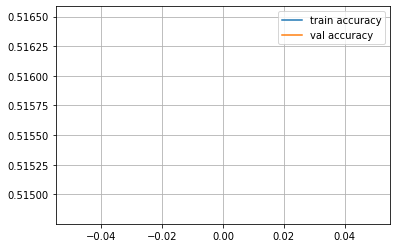

Epoch 1
Train accuracy: 0.5131453911941717
Val accuracy: 0.5135467980295566


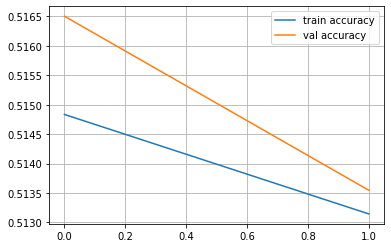

Epoch 2
Train accuracy: 0.5089219723366065
Val accuracy: 0.5056650246305419


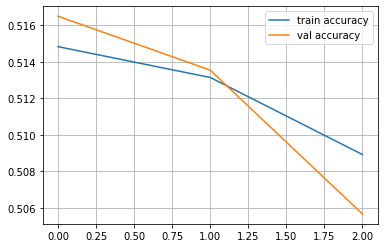

Epoch 3
Train accuracy: 0.5120895364797804
Val accuracy: 0.5096059113300493


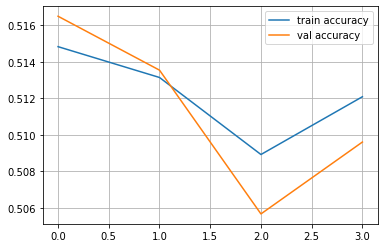

Epoch 4
Train accuracy: 0.5168408826945412
Val accuracy: 0.5155172413793103


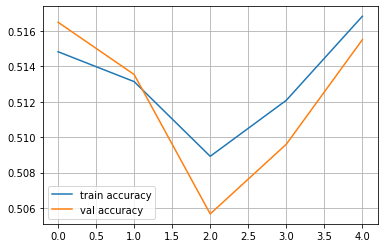

Epoch 5
Train accuracy: 0.5201140323091542
Val accuracy: 0.5219211822660098


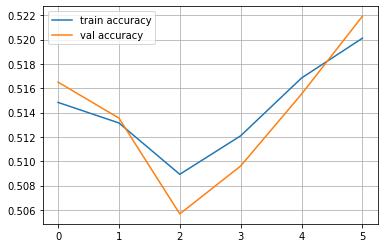

Epoch 6
Train accuracy: 0.5264491605955021
Val accuracy: 0.5288177339901478


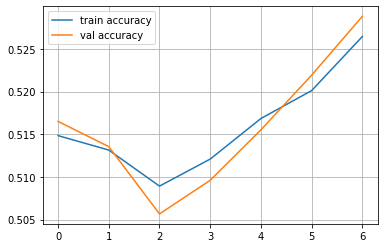

Epoch 7
Train accuracy: 0.5318340196388976
Val accuracy: 0.5352216748768472


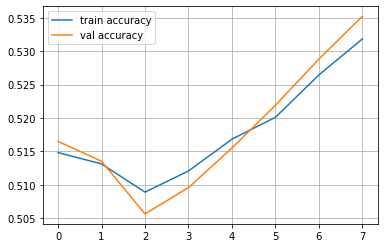

Epoch 8
Train accuracy: 0.5360574384964629
Val accuracy: 0.541871921182266


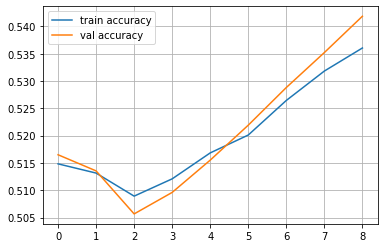

Epoch 9
Train accuracy: 0.541019955654102
Val accuracy: 0.5440886699507389


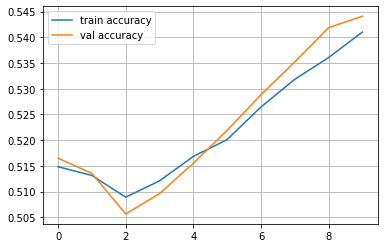

Epoch 10
Train accuracy: 0.5409143701826629
Val accuracy: 0.5485221674876847


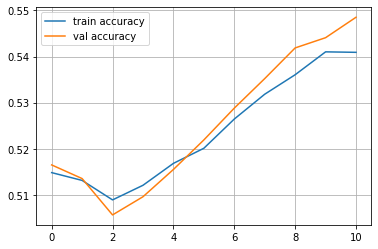

Epoch 11
Train accuracy: 0.5457713018688628
Val accuracy: 0.5568965517241379


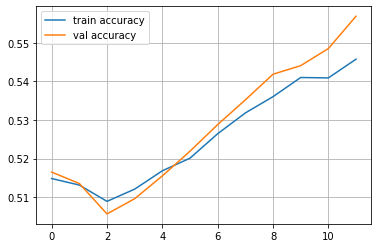

Epoch 12
Train accuracy: 0.5497835497835498
Val accuracy: 0.5583743842364532


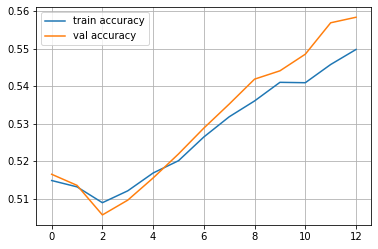

Epoch 13
Train accuracy: 0.553162284869602
Val accuracy: 0.55935960591133


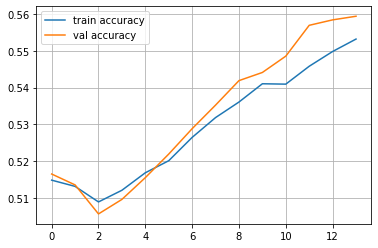

Epoch 14
Train accuracy: 0.5549572378840671
Val accuracy: 0.5625615763546798


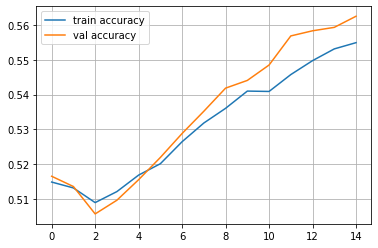

Epoch 15
Train accuracy: 0.5573857037271671
Val accuracy: 0.5692118226600985


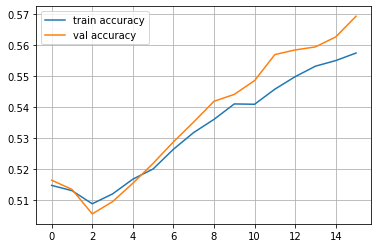

Epoch 16
Train accuracy: 0.557280118255728
Val accuracy: 0.5689655172413793


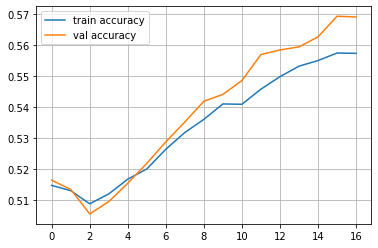

Epoch 17
Train accuracy: 0.5592862422130714
Val accuracy: 0.5724137931034483


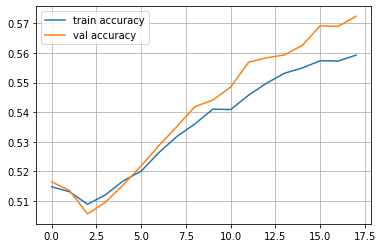

Epoch 18
Train accuracy: 0.5618202935276106
Val accuracy: 0.5719211822660099


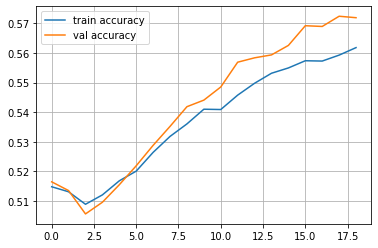

Epoch 19
Train accuracy: 0.5635096610706367
Val accuracy: 0.5741379310344827


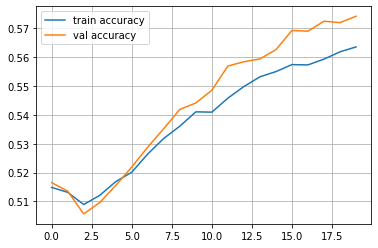

Epoch 20
Train accuracy: 0.5649878576707845
Val accuracy: 0.5738916256157636


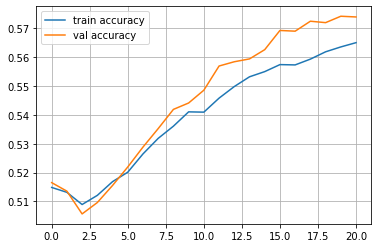

Epoch 21
Train accuracy: 0.5695280329426671
Val accuracy: 0.5780788177339902


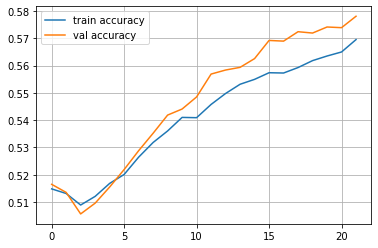

Epoch 22
Train accuracy: 0.5704783021856192
Val accuracy: 0.5802955665024631


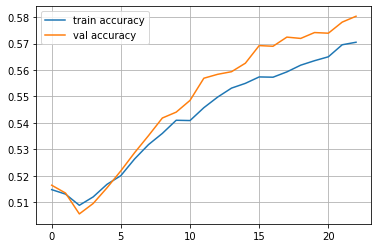

Epoch 23
Train accuracy: 0.5712174004856931
Val accuracy: 0.5817733990147783


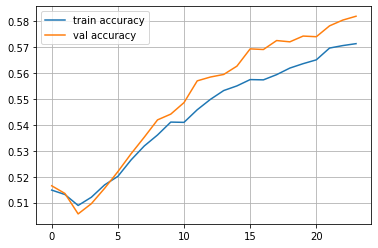

Epoch 24
Train accuracy: 0.5729067680287192
Val accuracy: 0.5815270935960591


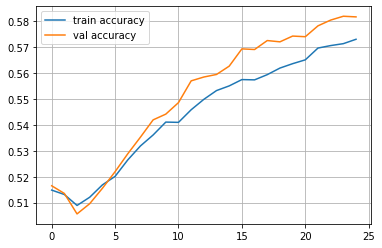

precision: 0.6288419797071668
recall: 0.5877199505371524
f1: 0.5650891502606417
accuracy: 0.5815270935960591
Confusion matrix: 
[[ 780  123  413]
 [ 203  419  793]
 [  68   99 1162]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(x_train, y_train)   
    train_log.append(np.mean(network.predict(x_train) == y_train))
    val_log.append(np.mean(network.predict(x_test) == y_test))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

## Έτοιμο Multi-Layer Perceptron 

Όπως και με τις τεχνικές των παραπάνω ερωτημάτων έτσι και εδώ υπάρχει έτοιμη η παραπάνω κλάση σε διάφορες βιβλιοθήκες. Έτσι στο δεύτερο μέρος του ερωτήματος αυτού θα κατασκευάσετε το ίδιο MLP χρησιμοποιώντας όμως την έτοιμη κλάση [MLPClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)  της βιβλιοθήκης scikit-learn. Παρακάτω παρουσιάζεται ένα παράδειγμα χρήσης της κλάσης αυτής. 

In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7383088867214519
recall: 0.7292231118271116
f1: 0.7297688104628843
accuracy: 0.7307881773399014
Confusion matrix: 
[[ 828  302  186]
 [ 177 1115  123]
 [  65  240 1024]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Σύγκριση υλοποιήσεων 

  

Στα παρακάτω κελιά πειραματιστείτε με τις δύο υλοποιήσεις (τη δική σας και την έτοιμη). Συγκρίνετε τα αποτελέσματά σας τόσο ως προς τους χρόνους εκτέλεσης αλλά και ως προς τα αποτελέσματα. Η διαφορά των αποτελεσμάτων προκύπτει από το ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία, στον τρόπο εκπαίδευσης κ.α. με αποτέλεσμα να προκύπτουν καλύτερα αποτέλεσματα. Παρόλα αυτά στην δική μας κλάση έχουμε καλύτερο έλεγχο και έχουμε την δυνατότητα να σχεδιάσουμε πιο σύνθετες αρχιτεκτονικές καθώς να αλλάξουμε τις τιμές παραμέτρων που στην έτοιμη κλάση μπορεί να μην μας δίνεται η δυνατότητα. 


### Εποχές = 25

In [ ]:
%%time
network = MLP([100, 200, 100, 10], len(inputs))

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(25):
    network.fit(x_train,y_train)
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.6582701046748115
recall: 0.6260587442930273
f1: 0.6115263064793589
accuracy: 0.6214285714285714
Confusion matrix: 
[[ 765  167  384]
 [ 206  567  642]
 [  29  109 1191]]
CPU times: user 10.8 s, sys: 3.01 s, total: 13.9 s
Wall time: 7.13 s


In [ ]:
%%time
epochs = 25 
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7636935339585144
recall: 0.7505038586410376
f1: 0.7528586953046128
accuracy: 0.7522167487684729
Confusion matrix: 
[[ 893  317  106]
 [ 160 1161   94]
 [  89  240 1000]]
CPU times: user 10 s, sys: 4.93 s, total: 15 s
Wall time: 7.71 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


### Εποχές = 50

In [ ]:
%%time
network = MLP([100, 200, 100, 10], len(inputs))

train_log = []
val_log = []

#Αυτά πρέπει να τρέχουν αφού έχετε φτιάξει σωστά τον κώδικα της MLP
for epoch in range(50):
    network.fit(x_train,y_train)
    train_log.append(np.mean(network.predict(x_train)==y_train))
    val_log.append(np.mean(network.predict(x_test)==y_test))

y_pred = network.predict(x_test)

eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.6751966547319398
recall: 0.6221851162238373
f1: 0.6093311936167619
accuracy: 0.6182266009852216
Confusion matrix: 
[[ 696  167  453]
 [ 146  596  673]
 [  15   96 1218]]
CPU times: user 21.4 s, sys: 5.79 s, total: 27.2 s
Wall time: 14 s


In [ ]:
%%time
epochs = 50
mlp = MLPClassifier(hidden_layer_sizes=(100, 200, 100), max_iter = epochs)

mlp.fit(x_train,y_train)

y_pred = mlp.predict(x_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7592264559983842
recall: 0.7540522060740927
f1: 0.7540049357757596
accuracy: 0.7546798029556651
Confusion matrix: 
[[ 876  274  166]
 [ 178 1090  147]
 [  48  183 1098]]
CPU times: user 21 s, sys: 14.1 s, total: 35.1 s
Wall time: 18.1 s


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


* Για το αρχικό μοντέλο με διαστάσεις [10, 15, 20, 3] και για 25 εποχές, παρατηρήσαμε πως η δική μας υλοποίηση παρουσιάζει χαμηλότερη επίδοση, καθώς έχει accuracy και f1 γύρω στο 56-58%, ενώ για τις ίδιες παραμέτρους, η έτοιμη υλοποίηση δίνει αποτελέσματα για τις μετρικές αυτές γύρω στο 73%. Όπως, αναφέρθηκε αυτή η διαφορά οφείλεται στο γεγονός ότι στην έτοιμη κλάση έχουν γίνει αρκετές βελτιστοποιήσεις στην λειτουργία και στον τρόπο εκπαίδευσης.

* Στη συνέχεια, αυξάνοντας τις διαστάσεις του μοτνέλου, σε [100, 200, 100, 10] για 25 εποχές, παρατηρήσαμε πως η επίδοση του δικού μας μοντέλου παρουσίασε μικρή αύξηση με accuracy και f1 κοντά στο 61-62%, ενώ η έτοιμη υλοποίηση παρουσίασε μικρή αλλαγή στην επίδοση δίνοντας τιμές γύρω στο 75%. Ύστερα, αυξάνοντας το πλήθος των εποχών σε 50, ούτε η δική μας υλοποίηση, ούτε η έτοιμη παρουσίασε περαιτέρω βελτίωση στην επίδοση.

* Όσον αφορά τους χρόνους υλοποίησης, το δικό μας MLP χρειάζεται γύρω στα 7 sec για 25 εποχές και 14 sec για 50 εποχές, ενώ το έτοιμο MLP, χρειάζεται περίπου 8 sec για 25 εποχές και 18 sec για 50 εποχές. Επομένως, η custom υλοποίηση είναι λίγο ταχύτερη, καθώς είναι απλούστερη, με αποτέλεσμα η διαδικασία εκπαίδευσης να διαρκεί λιγότερο αφού οι λειτουργίες του MLP είναι πιο λίγες και απλές σε σχέση με τον έτοιμο MLP Classifier.

# Αξιολόγηση- Συμπεράσματα 

  

Τέλος στο σημείο αυτό καλείστε να αξιολογήσετε τις διάφορες τεχνικές ταξινόμησης (KNN, Naive Bayes, MLP), τα αποτελέσματά τους, τους χρόνους εκτέλεσης, και να παραθέσετε παρατηρήσεις καθώς και οτιδήποτε σας φάνηκε ενδιαφέρον ή ιδιαίτερο. 



Συγκρίνοντας την επίδοση και τους χρόνους εκτέλεσης των τριών ταξινομητών και των διαφορετικών υλοποιήσεων, παρατηρούμε ότι το υψηλότερο accuracy και f1 δίνεται από την έτοιμη υλοποίηση του MLP, ενώ η χαμηλότερη επίδοση παροκύπτει από την ταξινόμηση με τη δική μας υλοποίηση του MLP. Εξίσου καλή σχεδόν επίδοση με το έτοιμο MLP έχουν όλοι οι υπόλοιποι ταξινομητές.

Όσον αφορά τους χρόνους εκτέλεσης, οι δύο υλοποιήσεις του MLP τρέχουν σε χρόνο περίπου 7 sec (όπως και η δική μας υλοποίηση του KNN), ενώ οι υπόλοιποι ταξινομητές, έχουν χρόνους εκτέλεσης περίπου μία τάξη μεγέθους μικρότερη. 

Επομένως, παρατηρώντας ότι ο οι περισσότεροι ταξινομητές είχαν εξίσου καλές επιδόσεις με το MLP, και συγκεκριμένα ο έτοιμος Gaussian Naive Bayes έχει  πολύ χαμηλότερο χρόνο εκτέλεσης, θεωρούμε ότι ο έτοιμος GNB θα ήταν ενδεχομένως η καλύτερη επιλογή για την ταξινόμηση των δείγμάτων στις τρεις κλάσεις του συγκεκριμένου προβλήματος.

Αξίζει να σημειωθεί ότι τα συμπεράσματα που λήφθησαν για την επίδοση και τους χρόνους εκτέλεσης πιθανόν να διαφοροποιούνταν αν κάνουμε πρόβλεψη πάνω σε ολόκληρο το test set. Στην δική μας περίπτωση για όλους τους classifiers έγινε πρόβλεψη στα πρώτα 100 στοιχεία του test set.

Μοντέλο | Accuracy | F1 | Χρόνος Εκτέλεσης
-------------------|--------------------|--------------------|--------------------
Δικός μας ΚΝΝ euclidean     | 0.74       | 0.7289775861204433      | 7.82 s
Δικός μας ΚΝΝ cosine    | 0.73       | 0.7123120410791645      | 736 ms
Sklearn KNN       | 0.73     | 0.721723578866436     | 19.4 ms
Δικός μας Naive Bayes       | 0.68     | 0.6640329433676736     | 51.1 ms 
Sklearn GNB       | 0.72 | 0.7111831258172723 | 5 ms
Δικό μας MLP       | 0.6214285714285714     | 0.6115263064793589     | 7.13 s 
Sklearn MLP       | 0.7522167487684729     | 0.7528586953046128     | 7.71 s
